<a href="https://colab.research.google.com/github/shenlong2010/python-finance/blob/main/BuySellDEMAIndicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit: Computer Science
https://www.youtube.com/watch?v=bdlwwmVWfPg&t=745s

In [1]:
# This program uses the Double Exponential Moving Average (DEMA) to determine when to buy and sell stock


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the stack data
from google.colab import files
files.upload()

Saving NIO.csv to NIO (4).csv


{'NIO.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n11/22/2019,2.04,2.05,1.88,1.94,1.94,25152300\r\n11/25/2019,1.99,2.12,1.96,2.05,2.05,36836400\r\n11/26/2019,2.12,2.29,2.12,2.28,2.28,55122700\r\n11/27/2019,2.32,2.5,2.28,2.46,2.46,77368600\r\n11/29/2019,2.36,2.36,2.2,2.27,2.27,32640300\r\n12/2/2019,2.35,2.44,2.3,2.44,2.44,32677500\r\n12/3/2019,2.31,2.48,2.25,2.4,2.4,37865200\r\n12/4/2019,2.42,2.58,2.41,2.42,2.42,46792900\r\n12/5/2019,2.53,2.57,2.25,2.27,2.27,53235200\r\n12/6/2019,2.32,2.34,2.2,2.26,2.26,31931900\r\n12/9/2019,2.21,2.25,2.11,2.22,2.22,31542900\r\n12/10/2019,2.2,2.28,2.14,2.27,2.27,25220200\r\n12/11/2019,2.26,2.32,2.23,2.26,2.26,20342900\r\n12/12/2019,2.3,2.33,2.26,2.27,2.27,22457900\r\n12/13/2019,2.31,2.43,2.29,2.39,2.39,37228900\r\n12/16/2019,2.44,2.55,2.39,2.48,2.48,36916800\r\n12/17/2019,2.54,2.63,2.5,2.59,2.59,45654500\r\n12/18/2019,2.58,2.67,2.54,2.63,2.63,31811100\r\n12/19/2019,2.69,2.73,2.61,2.62,2.62,36301300\r\n12/20/2019,2.65,2.72,2.63,2.69,2.69,50971500

In [4]:
# Store the data
df = pd.read_csv('NIO.csv')
# Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-11-22,11/22/2019,2.040000,2.050000,1.880000,1.940000,1.940000,25152300
2019-11-25,11/25/2019,1.990000,2.120000,1.960000,2.050000,2.050000,36836400
2019-11-26,11/26/2019,2.120000,2.290000,2.120000,2.280000,2.280000,55122700
2019-11-27,11/27/2019,2.320000,2.500000,2.280000,2.460000,2.460000,77368600
2019-11-29,11/29/2019,2.360000,2.360000,2.200000,2.270000,2.270000,32640300
...,...,...,...,...,...,...,...
2020-11-16,11/16/2020,41.119999,45.849998,41.099998,45.580002,45.580002,306209100
2020-11-17,11/17/2020,47.570000,49.369999,44.959999,46.590000,46.590000,345578500
2020-11-18,11/18/2020,45.750000,46.720001,42.500000,45.060001,45.060001,271678300
2020-11-19,11/19/2020,45.360001,48.919998,44.680000,48.450001,48.450001,233779100


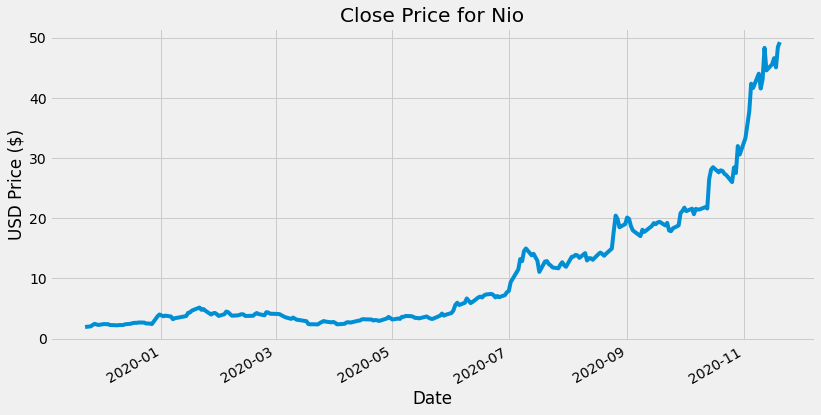

In [5]:
# Visually show the close price
df['Close'].plot(figsize=(12.2, 6.4))
plt.title("Close Price for Nio")
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show()

In [6]:
# Create a function to calculate the Double Exponential Moving Average (DEMA)
def DEMA(data, time_period, column):
  # Calculate the Exponential Moving Average for some time period
  EMA = data[column].ewm(span=time_period, adjust = False).mean()
  # Calculate the DEMA
  DEMA = 2 * EMA - EMA.ewm(span=time_period, adjust = False).mean()

  return DEMA

In [7]:
# Store the short term DEMA (20 day period) and the long term DEMA (50 day period) into the dataset
df['DEMA_short'] = DEMA(df, 20, 'Close')
# print(df['DEMA_short'])
df['DEMA_long'] = DEMA(df, 50, 'Close')

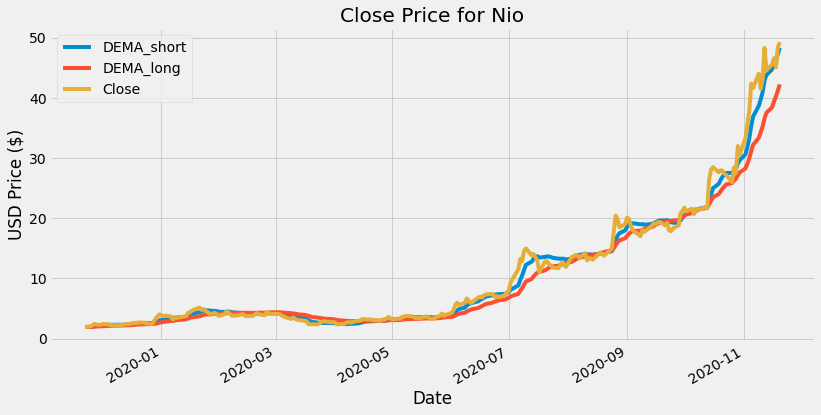

In [8]:
# Plot the chart
# Create a list of columns to keep
column_lst = ['DEMA_short', 'DEMA_long', 'Close']
df[column_lst].plot(figsize=(12.2, 6.4))
plt.title("Close Price for Nio")
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show()

In [9]:
# Function to buy and sell stock (The trading strategy)
def DEMA_strategy(data):
  buy_list = []
  sell_list = []
  flag = False
  
  for i in range(len(data)):
    if data["DEMA_short"][i] > data["DEMA_long"][i] and flag == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag = True
    elif data["DEMA_short"][i] < data["DEMA_long"][i] and flag == True:
      buy_list.append(np.nan)
      sell_list.append(data['Close'][i])
      flag = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  # Store the buy and sell signals/ lists into the data set
  data["Buy"] = buy_list
  print(data['Buy'])
  data["Sell"] = sell_list
  print(data["Sell"])

In [10]:
# Run the strategy to get the buy and sell signals
DEMA_strategy(df)

2019-11-22     NaN
2019-11-25    2.05
2019-11-26     NaN
2019-11-27     NaN
2019-11-29     NaN
              ... 
2020-11-16     NaN
2020-11-17     NaN
2020-11-18     NaN
2020-11-19     NaN
2020-11-20     NaN
Name: Buy, Length: 252, dtype: float64
2019-11-22   NaN
2019-11-25   NaN
2019-11-26   NaN
2019-11-27   NaN
2019-11-29   NaN
              ..
2020-11-16   NaN
2020-11-17   NaN
2020-11-18   NaN
2020-11-19   NaN
2020-11-20   NaN
Name: Sell, Length: 252, dtype: float64


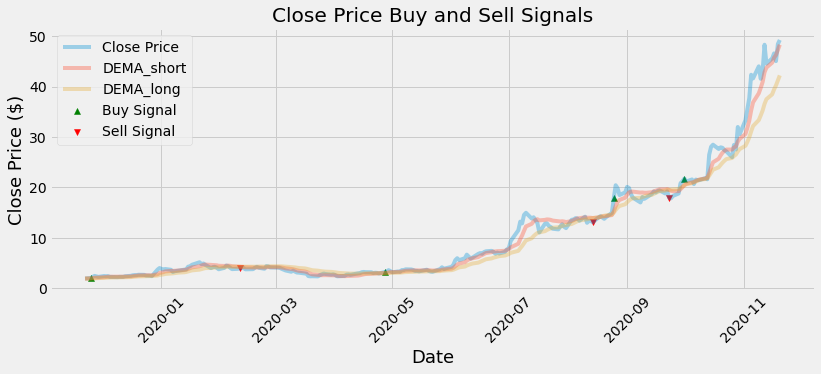

In [11]:
# Visually show the stock buy and sell signals
plt.figure(figsize=(12.2, 4.5)) # width, height
plt.scatter(df.index, df["Buy"], color = "green", label = "Buy Signal", marker = "^", alpha = 1)
plt.scatter(df.index, df["Sell"], color = "red", label = "Sell Signal", marker = "v", alpha = 1)
plt.plot(df["Close"], label = "Close Price", alpha = 0.35)
plt.plot(df["DEMA_short"], label = "DEMA_short", alpha = 0.35)
plt.plot(df["DEMA_long"], label = "DEMA_long", alpha = 0.35)
plt.xticks(rotation = 45)
plt.title("Close Price Buy and Sell Signals")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price ($)", fontsize = 18)
plt.legend(loc = "upper left")
plt.show()